# Chapter 10 - The VARMAX Model

## Listing 10-1. Prepare the Walmart data for the VARMAX model

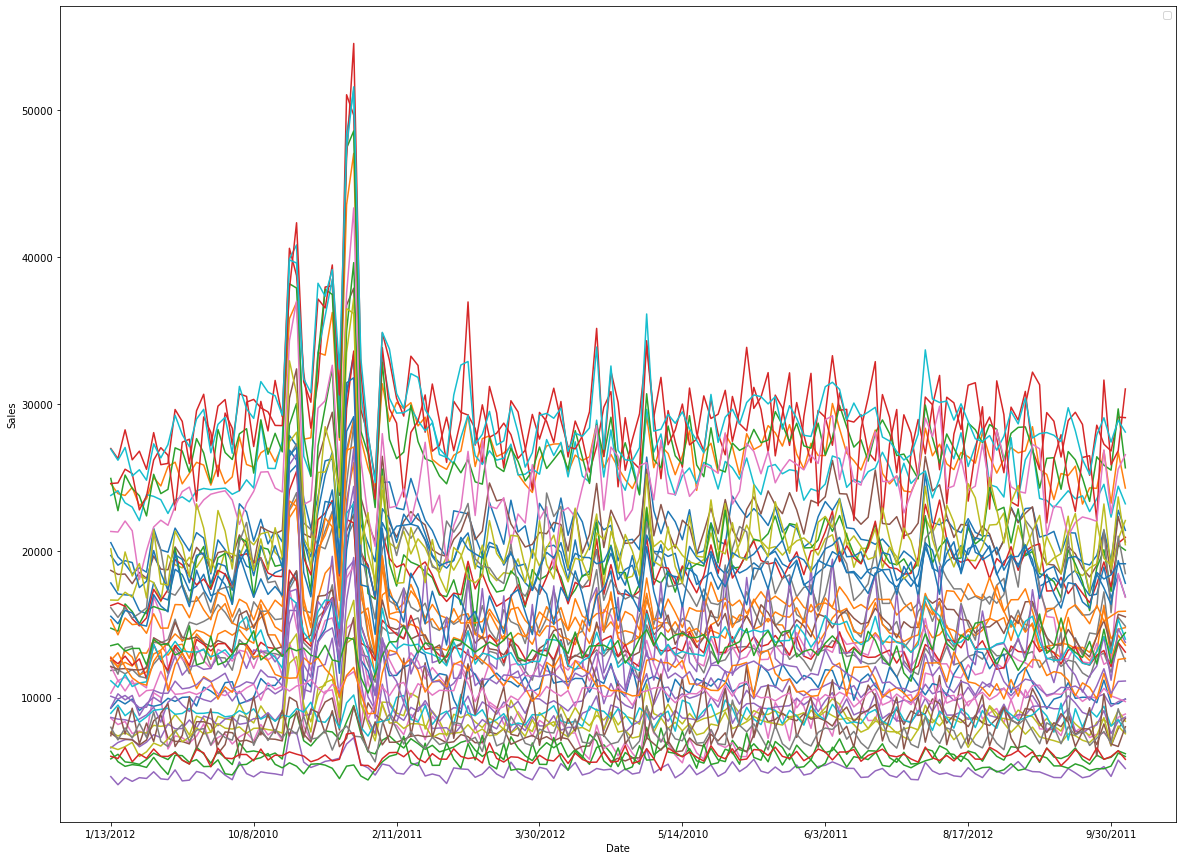

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
exog = data.groupby('Date')['IsHoliday'].sum() > 0
exog = exog.apply(lambda x: float(x))

data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')

ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()


## Listing 10-2. Running the VARMAX(1,1) model

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

train = data.iloc[:-10,[0,1,2]]
test = data.iloc[-10:,[0,1,2]]

train_exog = exog[:-10]
test_exog = exog[-10:]

mod = sm.tsa.VARMAX(train, order=(1,1), exog=train_exog)
res = mod.fit(maxiter=100, disp=False)

fcst = res.forecast(exog=test_exog.values, steps=10)
mape = mean_absolute_percentage_error(test, fcst)
model_accuracy = 1 - mape
print(model_accuracy)


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.9318437771648883


C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically rob